In [26]:
import math

import pandas as pd
import numpy as np

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


## Using One-Hot Encoding to encode Categorical data

In [27]:
#Coding Genders to 0 or 1, Female-0;Male-1
df['gender'] = [1 if x == 'Male' else 0 for x in df['gender']]

from sklearn.preprocessing import OneHotEncoder
categorical_cols = df.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(sparse=False, drop='first')  
encoded_data = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

df = pd.concat([df, encoded_df], axis=1)
df = df.drop(columns=categorical_cols)
df.head(10)

stroke_data = df['stroke']
df = df.drop(columns=['stroke'])
df = pd.concat([df, stroke_data], axis=1)

/Users/geolangsatnarzary/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Dealing with NaN values

### 1. Checking data distribution

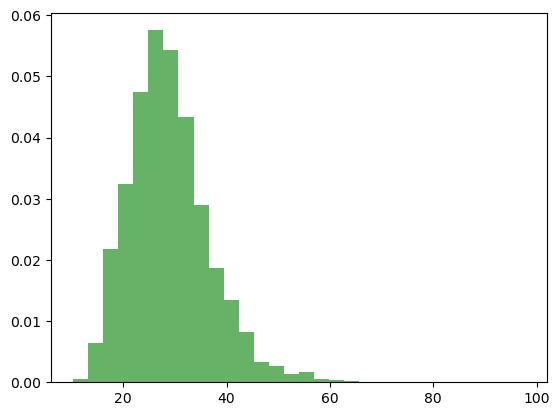

<Figure size 640x480 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.hist(df['bmi'], bins=30, density=True, alpha=0.6, color='g')

# Create a Q-Q plot
plt.figure()
plt.show()

#### Note: The data seems to be normally distributed from the graph with mean around 23.

### 2. Confirming normal distribution using p-values

In [29]:
from scipy.stats import shapiro
# Perform the Shapiro-Wilk test
stat, p = shapiro(df['bmi'])

if p > 0.05:
    print("The data appears to be normally distributed.")
else:
    print("The data does not appear to be normally distributed.")

The data appears to be normally distributed.


/Users/geolangsatnarzary/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### 3. Replacing NaN in BMI column with mean value (Normally Distributed)

In [30]:
df['bmi'] = [np.mean(df['bmi']) if pd.isna(x) else x for x in df['bmi']]
df.head(10)

,id,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,9046,1,67.0,0,1,228.69,36.600000,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1
1,51676,0,61.0,0,0,202.21,28.893237,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,31112,1,80.0,0,1,105.92,32.500000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,60182,0,49.0,0,0,171.23,34.400000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
4,1665,0,79.0,1,0,174.12,24.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
5,56669,1,81.0,0,0,186.21,29.000000,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1
6,53882,1,74.0,1,1,70.09,27.400000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
7,10434,0,69.0,0,0,94.39,22.800000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
8,27419,0,59.0,0,0,76.15,28.893237,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,60491,0,78.0,0,0,58.57,24.200000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1


## Using Logistic Regression for Prediction

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df['stroke'],test_size=0.2, random_state=1)

In [32]:
from sklearn.linear_model import LogisticRegression
X_train.head(10)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 93.74%
